<a href="https://colab.research.google.com/github/ViniciusSolon/Advanced-Sales-Analysis-for-Retail-Networks-Insights-with-Python-and-Data-Science/blob/main/An%C3%A1lise_Avan%C3%A7ada_de_Vendas_para_Redes_de_Varejo_Insights_com_Python_e_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
#'Office Supplies'?
import pandas as pd

# Reading the dataset
try:
    csv = pd.read_csv("dataset.csv")
    table = pd.DataFrame(csv)
except FileNotFoundError:
    print("Error: The file 'dataset.csv' was not found.")
    exit()

# Filtering the relevant data
filter_table = table.filter(items=["Cidade", "Categoria", "Valor_Venda"])

# Further filtering for 'Office Supplies' category
filter_table_with_col = filter_table[filter_table["Categoria"] == "Office Supplies"]

# Finding the city with the highest sales value in 'Office Supplies'
highest_sales_city = filter_table_with_col.sort_values(by="Valor_Venda", ascending=False).head(1)

highest_sales_city

,Cidade,Categoria,Valor_Venda
9036,Detroit,Office Supplies,9892.74


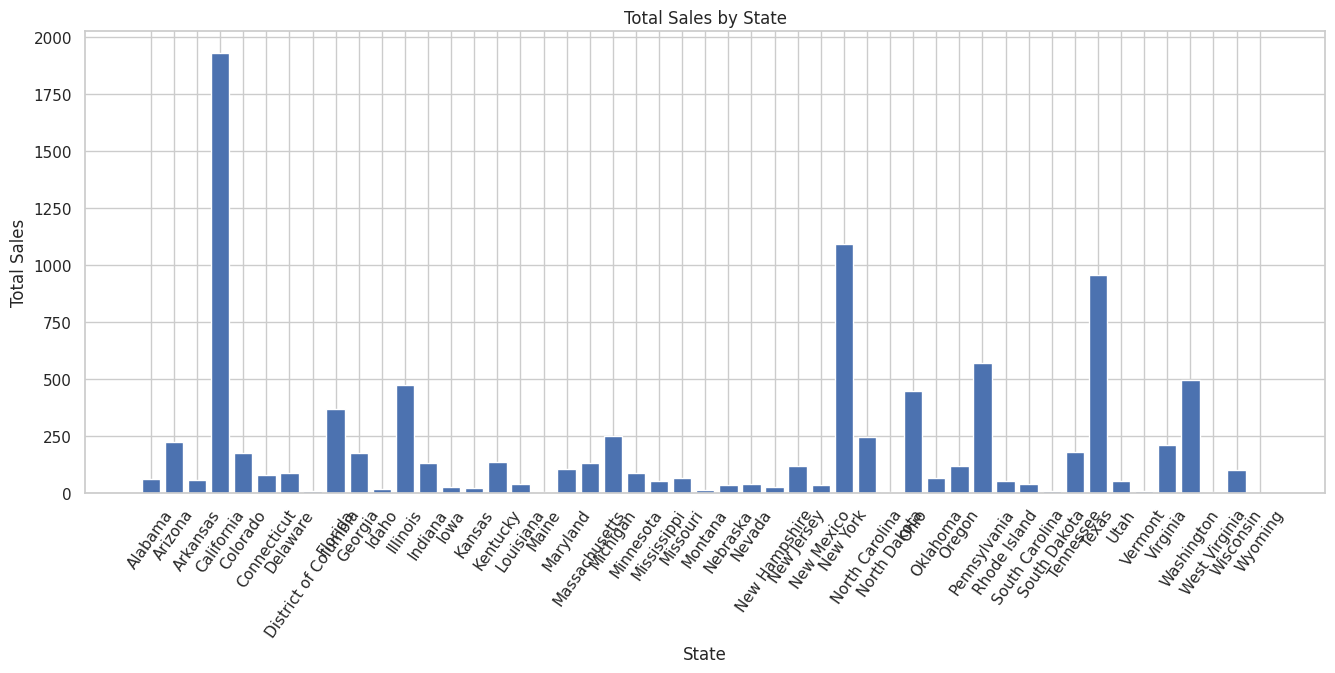

In [50]:
#What is the Total Sales by State?
import matplotlib.pyplot as plt
import pandas as pd

# Reading the dataset
try:
    csv = pd.read_csv("dataset.csv")
    table = pd.DataFrame(csv)
except FileNotFoundError:
    print("Error: The file 'dataset.csv' was not found.")
    exit()

# Grouping the sales data by State
sales_by_state = table.groupby("Estado")["Valor_Venda"].count()

# Plotting the data
plt.figure(figsize=(16, 6))
plt.bar(sales_by_state.index, sales_by_state.values)

# Adding labels and title
plt.xlabel("State")
plt.ylabel("Total Sales")
plt.title("Total Sales by State")
plt.xticks(rotation=55)  # Rotating x-axis labels for better readability

plt.show()


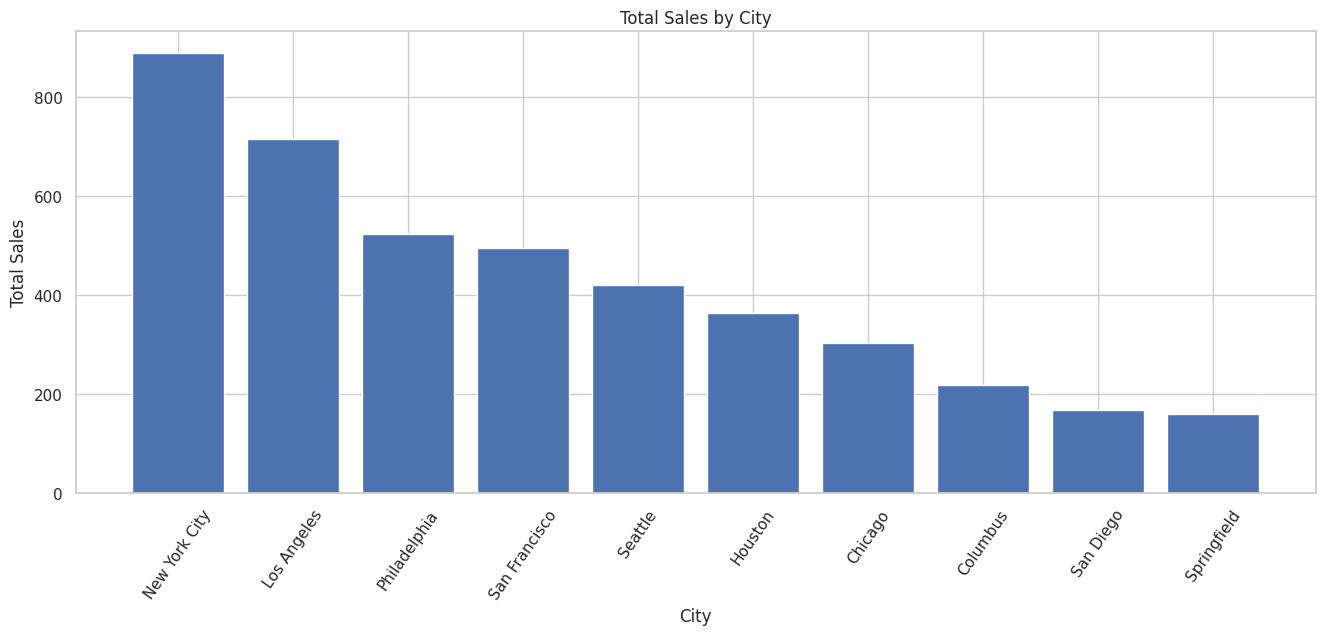

In [49]:
#Which Are the 10 Cities with the Highest Total Sales?
import matplotlib.pyplot as plt
import pandas as pd

# Reading the dataset
try:
    csv = pd.read_csv("dataset.csv")
    table = pd.DataFrame(csv)
except FileNotFoundError:
    print("Error: The file 'dataset.csv' was not found.")
    exit()

# Grouping the sales data by City and counting the number of sales in each city
sales_by_city = table.groupby("Cidade")["Valor_Venda"].count()

# Sorting the sales count in descending order
sorted_sales = sales_by_city.sort_values(ascending=False)

# Selecting the top 10 cities with the highest sales
top_10_cities = sorted_sales.head(10)

# Plotting the data
plt.figure(figsize=(16, 6))
plt.bar(top_10_cities.index, top_10_cities.values)

# Adding labels and title
plt.xlabel("City")
plt.ylabel("Total Sales")
plt.title("Total Sales by City")
plt.xticks(rotation=55)  # Rotating the x-axis labels for better readability

plt.show()



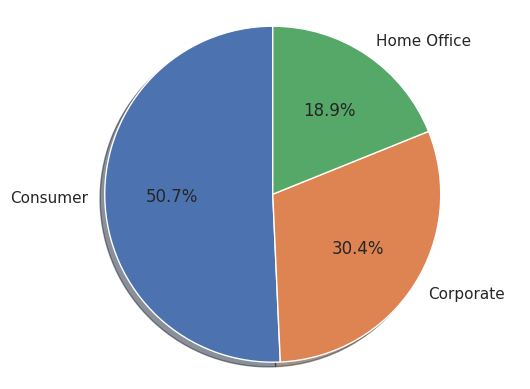

In [48]:
"""Which Segment Had the Highest Total Sales?
"""
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Reading the dataset
try:
    dataset = pd.read_csv("dataset.csv")
except FileNotFoundError:
    print("Error: The file 'dataset.csv' was not found.")
    exit()

# Grouping the sales data by Segment and calculating the sum of sales for each segment
sales_table = (
    dataset.groupby("Segmento")["Valor_Venda"]
    .sum()
    .sort_values(ascending=False)
)

# Selecting the top 10 segments with the highest sales
top_10_segments = sales_table.head(10)

# Segment labels and corresponding sales values for plotting
segments = top_10_segments.index
values = top_10_segments.values

# Plotting a pie chart
fig, ax = plt.subplots()
ax.pie(
    values,
    labels=segments,
    autopct="%1.1f%%",  # Display percentage with one decimal place
    shadow=True,  # Add shadow to the pie slices for better visual separation
    startangle=90  # Start the pie chart at 90 degrees
)
ax.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


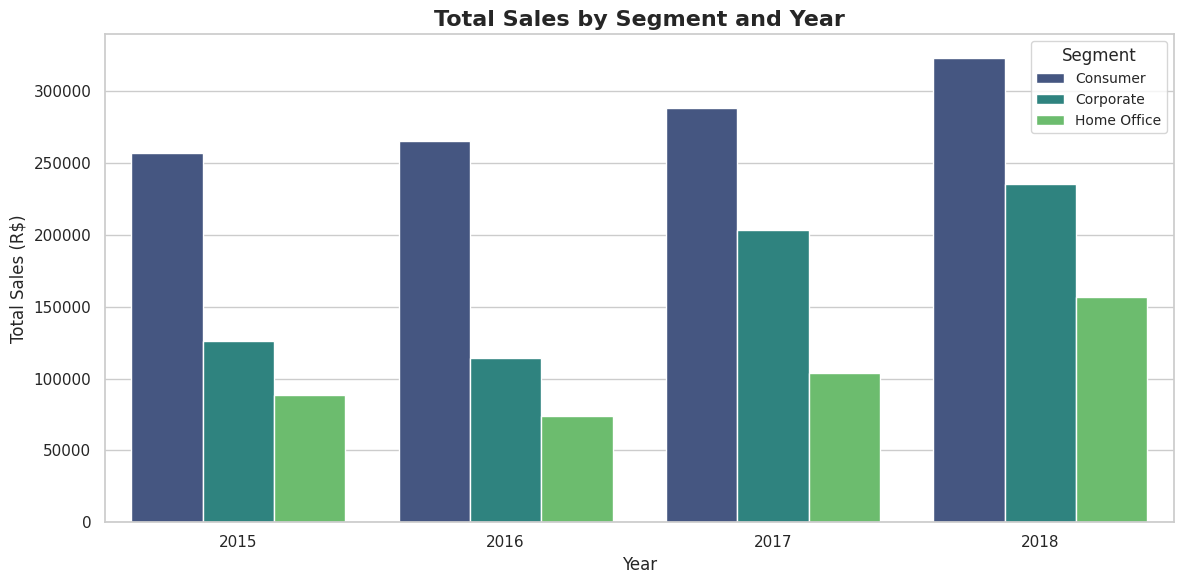

In [47]:
"""
Business Question 6:
What is the total sales value by Segment and Year?"""
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Reading the dataset
try:
    dataset = pd.read_csv("dataset.csv")
except FileNotFoundError:
    print("Error: The file 'dataset.csv' was not found.")
    exit()

# Converting the 'Data_Pedido' column to datetime format and extracting the year
dataset["Ano"] = pd.to_datetime(dataset["Data_Pedido"], format='%d/%m/%Y').dt.year

# Grouping the data by 'Segmento' and 'Ano' to calculate the total sales
sales_data = (
    dataset.groupby(["Segmento", "Ano"])["Valor_Venda"]
    .sum()
    .reset_index()
)

# Setting the theme for the plot
sns.set_theme(style="whitegrid")

# Creating the bar plot
plt.figure(figsize=(12, 6))
sales_plot = sns.barplot(
    data=sales_data,
    x="Ano",
    y="Valor_Venda",
    hue="Segmento",
    palette="viridis"
)

# Adding title and labels to the plot
sales_plot.set_title("Total Sales by Segment and Year", fontsize=16, weight='bold')
sales_plot.set_xlabel("Year", fontsize=12)
sales_plot.set_ylabel("Total Sales (R$)", fontsize=12)
sales_plot.legend(title="Segment", fontsize=10, title_fontsize=12)

# Adjusting the layout for better visualization
plt.tight_layout()
plt.show()



In [ ]:
"""**The company's managers are considering offering different discount rates and would like to simulate based on the rule below:

If Valor_Venda is greater than 1000, apply a 15% discount.
If Valor_Venda is less than or equal to 1000, apply a 10% discount.
How many sales would receive a 15% discount?**
"""
import pandas as pd

# Reading the dataset
try:
    dataset = pd.read_csv("dataset.csv")
except FileNotFoundError:
    print("Error: The file 'dataset.csv' was not found.")
    exit()

# Count the number of sales with a value greater than 1000, which receive a 15% discount
sales_with_15_discount = dataset[dataset["Valor_Venda"] > 1000].shape[0]

# Print the result
print(f"Number of sales that would receive a 15% discount: {sales_with_15_discount}")


Valor_Venda    457
dtype: int64


In [ ]:
""" Consider that the company decides to grant a 15% discount on the previous item.
What would be the average sales value before and after the discount?
"""

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Reading the dataset
try:
    dataset = pd.read_csv("dataset.csv")
except FileNotFoundError:
    print("Error: The file 'dataset.csv' was not found.")
    exit()

# Display the first few rows of the dataset (optional)
# print(dataset.head())

# Add a 'discount' column based on the sales value
# Items with sales value > 1000 get a 15% discount, others get 10%
dataset["discount"] = dataset["Valor_Venda"].apply(lambda x: 0.15 if x > 1000 else 0.10)

# Calculate the discounted sales value
dataset["Valor_Venda_Descontado"] = dataset["Valor_Venda"] - (dataset["Valor_Venda"] * dataset["discount"])

# Calculate the average sales values before and after the discount
average_before_discount = dataset["Valor_Venda"].mean()
average_after_discount = dataset["Valor_Venda_Descontado"].mean()

# Print the results
print(f"Average Sales Value Before Discount: {round(average_before_discount, 2)}")
print(f"Average Sales Value After Discount: {round(average_after_discount, 2)}")



Valor_Venda    457
dtype: int64
Média do Valor de Venda Antes do Desconto: 230.47
Média do Valor de Venda Depois do Desconto: 202.44


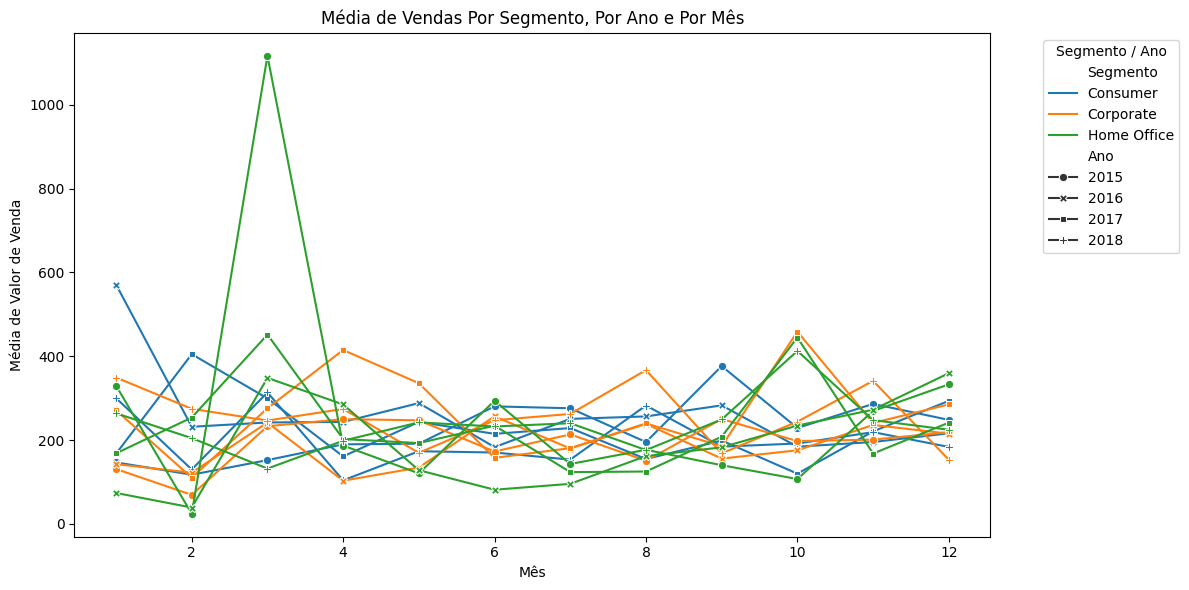

In [46]:
"""What is the Average Sales by Segment, by Year, and by Month?
Display the result using a line chart."""
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Reading the dataset
try:
    table = pd.read_csv("dataset.csv")
except FileNotFoundError:
    print("Erro: O arquivo 'dataset.csv' não foi encontrado.")
    exit()

# Converting the date column
table["Data_Pedido"] = pd.to_datetime(table["Data_Pedido"], format='%d/%m/%Y')

# Adding Year and Month columns
table["Ano"] = table["Data_Pedido"].dt.year
table["Mês"] = table["Data_Pedido"].dt.month

# Grouping by Year, Month, and Segment to calculate the average sales
sales_table = (
    table.groupby(["Ano", "Mês", "Segmento"])["Valor_Venda"]
    .mean()
    .reset_index()
)

# Creating the line chart
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=sales_table,
    x="Mês",
    y="Valor_Venda",
    hue="Segmento",
    style="Ano",
    markers=True,
    dashes=False
)

# Adding titles and labels
plt.title("Média de Vendas Por Segmento, Por Ano e Por Mês")
plt.xlabel("Mês")
plt.ylabel("Média de Valor de Venda")
plt.legend(title="Segmento / Ano", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


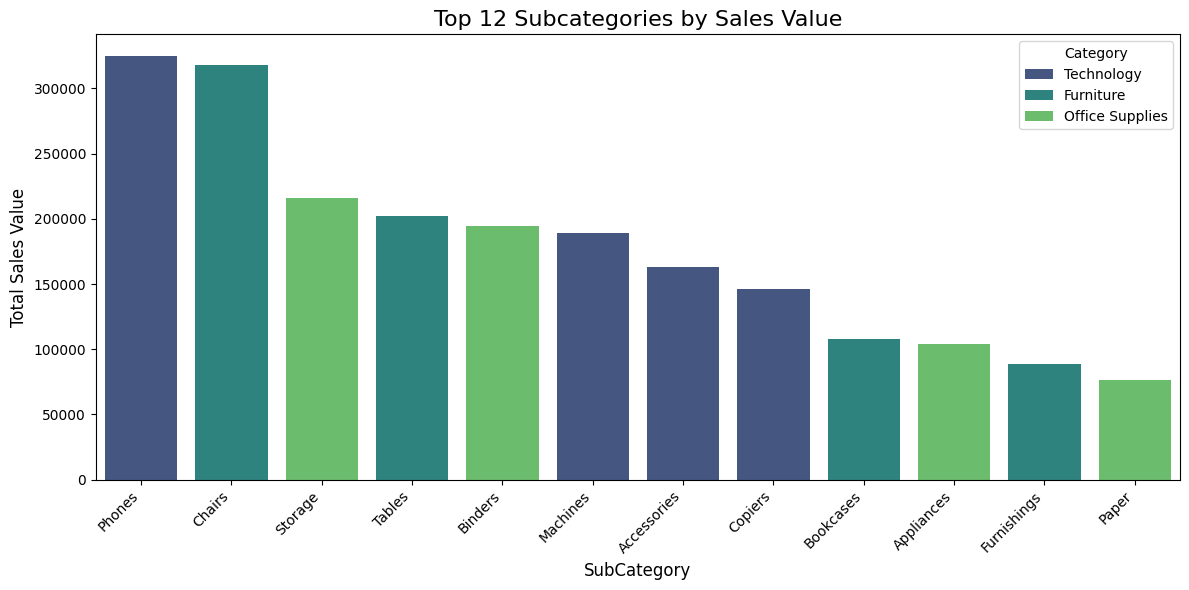

In [45]:
""""What is the Total Sales by Category and SubCategory, Considering Only the Top 12 SubCategories?
Display everything through a single chart."""
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Read the dataset
try:
    dataset = pd.read_csv("dataset.csv")
except FileNotFoundError:
    print("Error: The file 'dataset.csv' was not found.")
    exit()

# Display the first few rows of the dataset for validation (optional)
# print(dataset.head())

# Group by 'Category' and 'SubCategory', summing sales values, and sort in descending order
sales_by_category = (
    dataset.groupby(["Categoria", "SubCategoria"])["Valor_Venda"]
    .sum()
    .sort_values(ascending=False)
)

# Select the top 12 subcategories by sales value
top_12_subcategories = sales_by_category.head(12)

# Reset index for visualization
top_12_subcategories = top_12_subcategories.reset_index()

# Plot the sales data for the top 12 subcategories
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_12_subcategories,
    x="SubCategoria",
    y="Valor_Venda",
    hue="Categoria",
    palette="viridis"
)

# Set plot titles and labels
plt.title("Top 12 Subcategories by Sales Value", fontsize=16)
plt.xlabel("SubCategory", fontsize=12)
plt.ylabel("Total Sales Value", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.legend(title="Category", loc="upper right")
plt.tight_layout()

# Show the plot
plt.show()
